# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_complete = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_total = len(mouse_metadata)
mice_total

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = study_complete[study_complete.duplicated(subset=["Mouse ID","Timepoint"])]["Mouse ID"].unique()

duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse = study_complete.loc[study_complete["Mouse ID"] == "g989"]
duplicate_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_complete = study_complete.drop_duplicates(subset=["Mouse ID","Timepoint"])

#clean_g989 = clean_complete.loc[study_complete["Mouse ID"] == "g989"]
#clean_g989.head()

clean_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_total = len(clean_complete["Mouse ID"].unique())

mice_total

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_group_mean = clean_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_group_median = clean_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_group_var = clean_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_group_std = clean_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_group_sem = clean_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

## Validation of statistics
#drug_group_mean.head(15)
#drug_group_median.head(15)
#drug_group_var.head(15)
#drug_group_std.head(15)
#drug_group_sem.head(15)

# Assemble the resulting series into a single summary DataFrame.
study_summary = pd.DataFrame({
    "Mean Tumor Volume": drug_group_mean,
    "Median Tumor Volume": drug_group_median,
    "Tumor Volume Variance": drug_group_var,
    "Tumor Volume Std. Dev.": drug_group_std,
    "Tumor Volume Std. Err.": drug_group_sem
})

study_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line




## Bar and Pie Charts

[Text(0, 0, '230'),
 Text(0, 0, '228'),
 Text(0, 0, '188'),
 Text(0, 0, '186'),
 Text(0, 0, '182'),
 Text(0, 0, '181'),
 Text(0, 0, '181'),
 Text(0, 0, '178'),
 Text(0, 0, '178'),
 Text(0, 0, '156')]

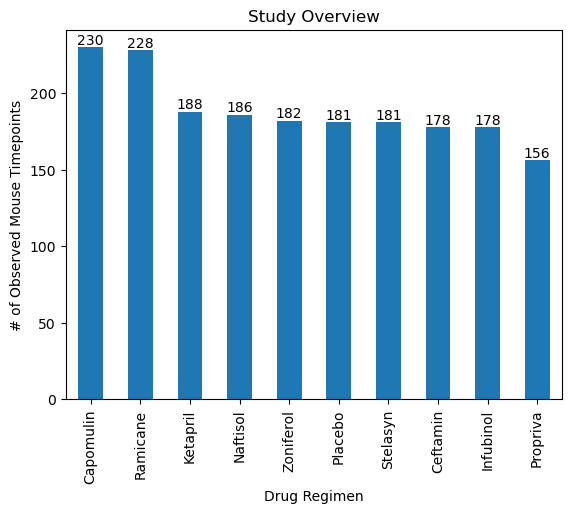

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
chart_pandas = clean_complete.groupby(
    "Drug Regimen")["Mouse ID"].count().sort_values(ascending=False).plot(
    kind="bar", title = "Study Overview", xlabel = "Drug Regimen",
    ylabel = "# of Observed Mouse Timepoints")

chart_pandas.bar_label(chart_pandas.containers[0])

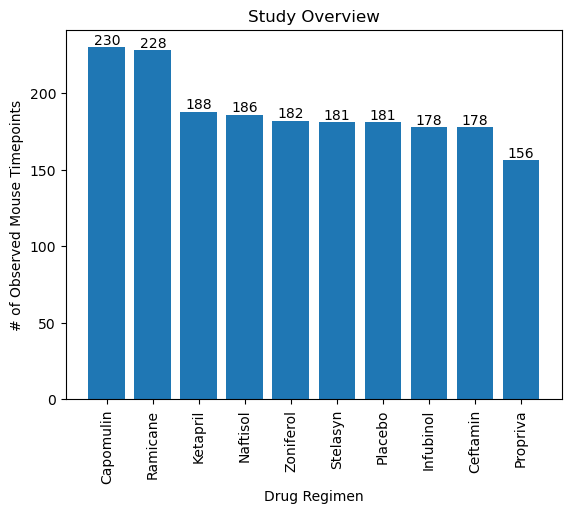

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

## Get counts from each Drug Regimen

values = clean_complete["Drug Regimen"].value_counts()

## Create plot
fig, ax = plt.subplots()
bar_container = ax.bar(values.keys(), values)
plt.title("Study Overview")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)

ax.bar_label(bar_container)

plt.show()

<Axes: ylabel='Count'>

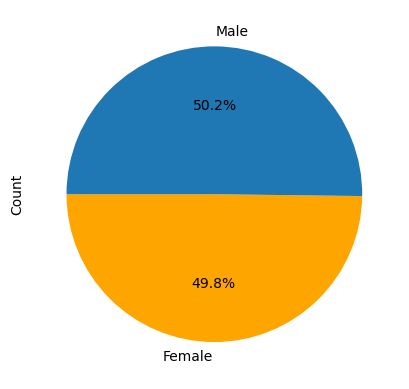

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_distribution = mouse_metadata.groupby("Sex")["Sex"].count()

#sex_distribution_df.head()

# Make the pie chart
sex_distribution.plot.pie(y=sex_distribution, autopct="%1.1f%%", 
                          startangle = 180, ylabel = "Count", colors = ["orange", "#1f77b4"])


Text(0, 0.5, 'Count')

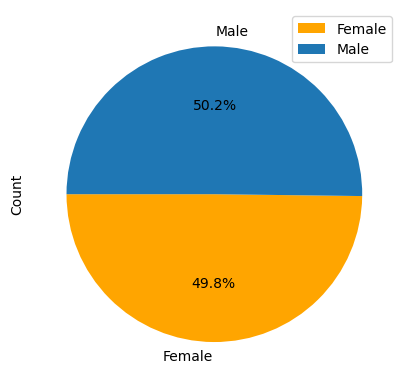

In [36]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_distribution = mouse_metadata.groupby("Sex")["Sex"].count()
sex_labels = sex_distribution.keys()
sex_distribution 

#sex_distribution.head()

# Make the pie chart

fig, ax = plt.subplots()
ax.pie(sex_distribution, labels = sex_labels, autopct='%1.1f%%', 
       startangle = 180, colors = ["orange", "#1f77b4"])
plt.legend(sex_distribution.index)
plt.ylabel("Count")

# plt.show


## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
clean_last_timepoint = clean_complete.drop_duplicates(subset=["Mouse ID"], keep="last")
clean_last_timepoint_4drugs = clean_last_timepoint.loc[(clean_last_timepoint["Drug Regimen"] == "Capomulin") |
                                                (clean_last_timepoint["Drug Regimen"] == "Ramicane") |
                                                (clean_last_timepoint["Drug Regimen"] == "Infubinol") |
                                                (clean_last_timepoint["Drug Regimen"] == "Ceftamin")]
clean_last_timepoint_4drugs.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
182,u153,0,45.000000,0,Ceftamin,Female,11,25
194,b447,0,45.000000,0,Ceftamin,Male,2,30
217,x226,0,45.000000,0,Ceftamin,Male,23,28
222,t573,0,45.000000,0,Ceftamin,Female,15,27
420,c326,5,36.321346,0,Infubinol,Female,18,25


In [60]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = []
for drug in clean_last_timepoint_4drugs["Drug Regimen"]:
    treatments.append(drug)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
for tumor_volumes in clean_last_timepoint_4drugs["Tumor Volume (mm3)"]:
    tumor_vol.append(tumor_volumes)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
IQR = tumor_vol 

    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


[45.0,
 45.0,
 45.0,
 45.0,
 36.3213458,
 43.16637266,
 46.25011212,
 47.01036401,
 45.69933088,
 47.7846818,
 46.78453491,
 39.95234669,
 44.18345092,
 51.54243058,
 46.53920617,
 48.72207785,
 30.48598484,
 54.04860769,
 50.00513807,
 52.92534846,
 56.05774909,
 55.65068132,
 43.41938077,
 60.96971133,
 38.34200823,
 54.65654872,
 57.03186187,
 58.26844248,
 55.74282869,
 60.16518046,
 57.91838132,
 55.62942846,
 62.11727887,
 38.75326548,
 36.56165229,
 64.19234114,
 67.28962147,
 31.09533505,
 38.98287774,
 59.85195552,
 64.72983655,
 68.59474498,
 34.45529799,
 41.48300765,
 61.84902336,
 38.4076183,
 45.22086888,
 37.07402422,
 67.68556862,
 36.37451039,
 72.2267309,
 62.75445141,
 65.52574285,
 32.37735684,
 66.19691151,
 67.52748237,
 40.1592203,
 66.08306589,
 30.27623175,
 31.8962384,
 30.63869575,
 33.32909778,
 40.65900627,
 62.43540402,
 67.97341878,
 60.91876652,
 30.56462509,
 67.74866174,
 22.05012627,
 38.84687569,
 40.65812366,
 33.39765251,
 36.13485243,
 38.93963263

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
